## Calling CSV file

In [2]:
import pandas as pd


In [3]:
data=pd.read_csv('project_data.csv')
data.head()


,id,Gender,Age,Region_Code,Location_Type,Education,Annual_Income,Vehicle_Type,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy
0,1,Male,44,NE,Urban,Bachelors,121362,Normal Car,0,> 20 Years,Yes,Platinium Tier II
1,2,Male,76,S,Suburban,Bachelors,100608,SUV,0,10-20 Years,No,Gold Tier II
2,3,Male,47,NE,Urban,Bachelors,114882,SUV,0,> 20 Years,Yes,Gold Tier I
3,4,Male,21,S,Suburban,College,85857,Normal Car,1,< 10 Years,No,Silver Tier II
4,5,Female,29,W,Rural,College,82488,SUV,1,< 10 Years,No,Silver Tier II


## EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508146 entries, 0 to 508145
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  508146 non-null  int64 
 1   Gender              508146 non-null  object
 2   Age                 508146 non-null  int64 
 3   Region_Code         508146 non-null  object
 4   Location_Type       508146 non-null  object
 5   Education           508146 non-null  object
 6   Annual_Income       508146 non-null  int64 
 7   Vehicle_Type        508146 non-null  object
 8   Previously_Insured  508146 non-null  int64 
 9   Vehicle_Age         508146 non-null  object
 10  Vehicle_Damage      508146 non-null  object
 11  Policy              508146 non-null  object
dtypes: int64(4), object(8)
memory usage: 46.5+ MB


In [149]:
data.describe()

,id,Age,Annual_Income,Previously_Insured
count,508146.000000,508146.000000,5.081460e+05,508146.000000
mean,254073.500000,38.808413,9.166336e+04,0.458667
std,146689.259281,15.500179,5.143972e+04,0.498289
min,1.000000,20.000000,7.890000e+03,0.000000
25%,127037.250000,25.000000,7.314300e+04,0.000000
50%,254073.500000,36.000000,9.498300e+04,0.000000
75%,381109.750000,49.000000,1.182112e+05,1.000000
max,508146.000000,85.000000,1.620495e+06,1.000000


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
data.corr()


,id,Age,Annual_Income,Previously_Insured
id,1.000000,-0.000643,0.001042,0.002557
Age,-0.000643,1.000000,0.067392,-0.255582
Annual_Income,0.001042,0.067392,1.000000,0.004776
Previously_Insured,0.002557,-0.255582,0.004776,1.000000


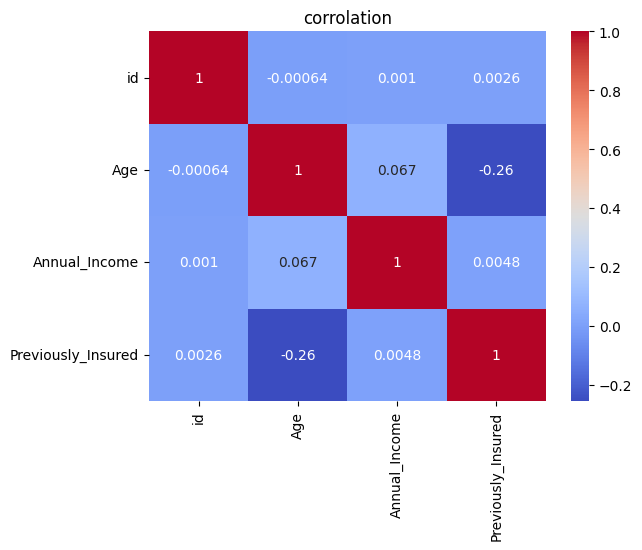

In [13]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.title("corrolation")
plt.show()

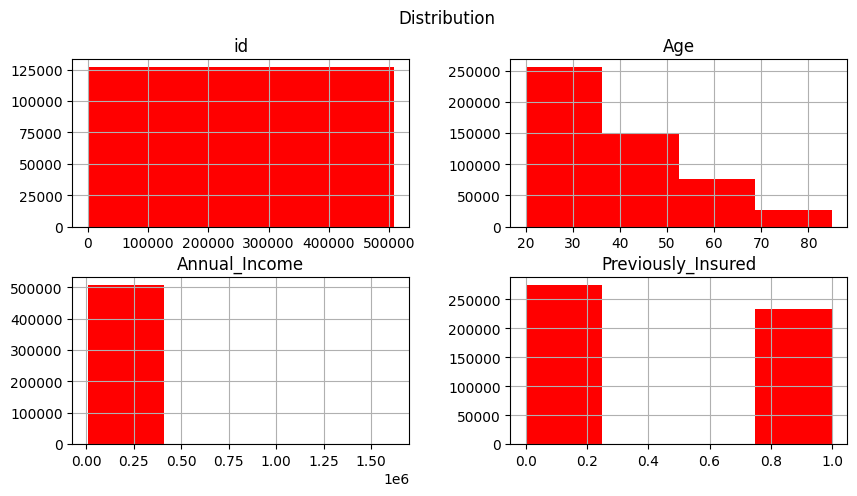

In [150]:
data.hist(bins=4,figsize=(10,5),color='red')
plt.suptitle("Distribution")
plt.show()

## Finding null vakues in each cloumn

In [105]:
data.isnull()
data.isnull().sum()

id                    0
Gender                0
Age                   0
Region_Code           0
Location_Type         0
Education             0
Annual_Income         0
Vehicle_Type          0
Previously_Insured    0
Vehicle_Age           0
Vehicle_Damage        0
Policy                0
dtype: int64

## generate the histogram for age distribution

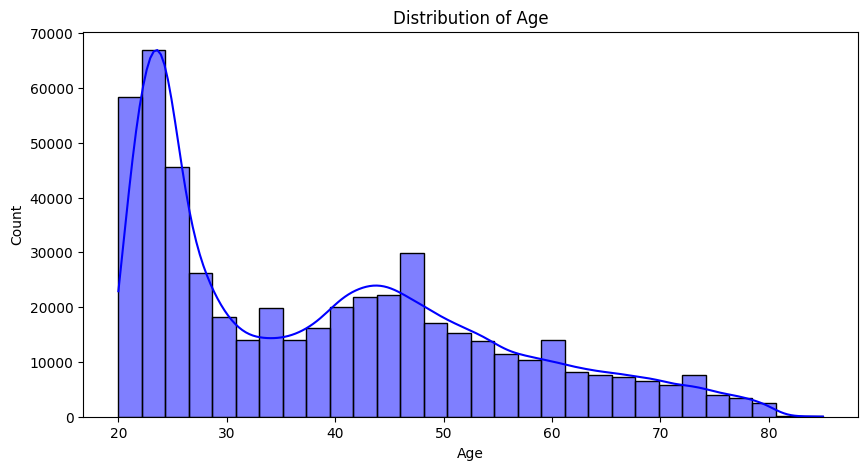

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.histplot(data['Age'],bins=30, kde=True, color='blue')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Age")
plt.show()

## Compare the number of policies taken by males and females
Males show more interest in high-tier policies (Platinum Tier I & II).
Females tend to opt for Gold Tier II policies at a higher rate.
Basic insurance remains the most chosen option across genders.

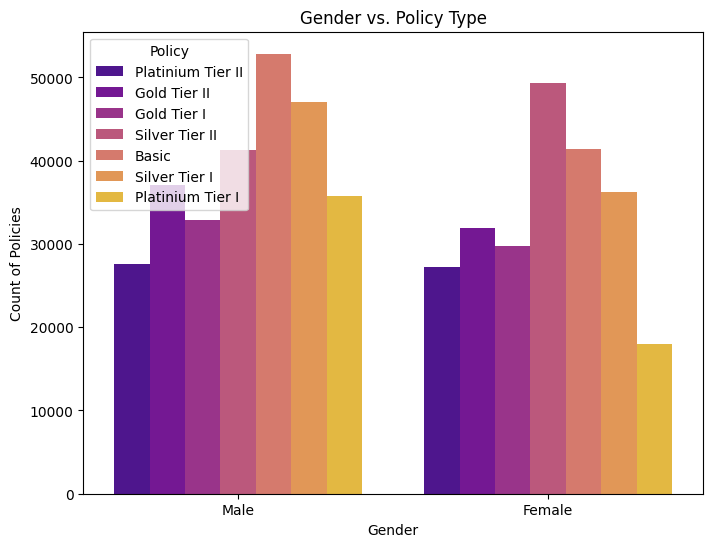

In [6]:
plt.figure(figsize=(8, 6))

# Create a countplot for Gender vs. Policy Type
sns.countplot(data, x="Gender", hue="Policy", palette="plasma")
plt.xlabel("Gender")
plt.ylabel("Count of Policies")
plt.title("Gender vs. Policy Type")
plt.show()

## Annual Income Distribution
-Most incomes fall within a small range (indicated by the blue box).
-A large number of outliers (high-income individuals) are present.
-The data has a high variance with a long tail on the upper end.

<Figure size 600x600 with 0 Axes>

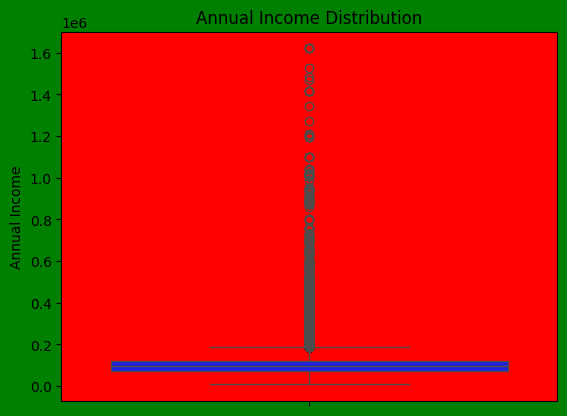

In [145]:
plt.figure(figsize=(6, 6))
fig,ax=plt.subplots()
fig.set_facecolor("green")
ax.set_facecolor("red")

# Create a box plot for Annual Income
sns.boxplot(data, y="Annual_Income", color="blue")
plt.ylabel("Annual Income")
plt.title("Annual Income Distribution")
plt.show()

## Cleaning + preprocessing

## Proportion of damaged vs. undamaged vehicles by vehicle age
Older vehicles (10-20 years) tend to have more damage compared to newer ones.
Newer vehicles (< 10 years) are less likely to be damaged, possibly due to better maintenance, newer technology, or stricter safety regulations.
Very old vehicles (> 20 years) are rare, which may indicate they are either phased out or not commonly insured.

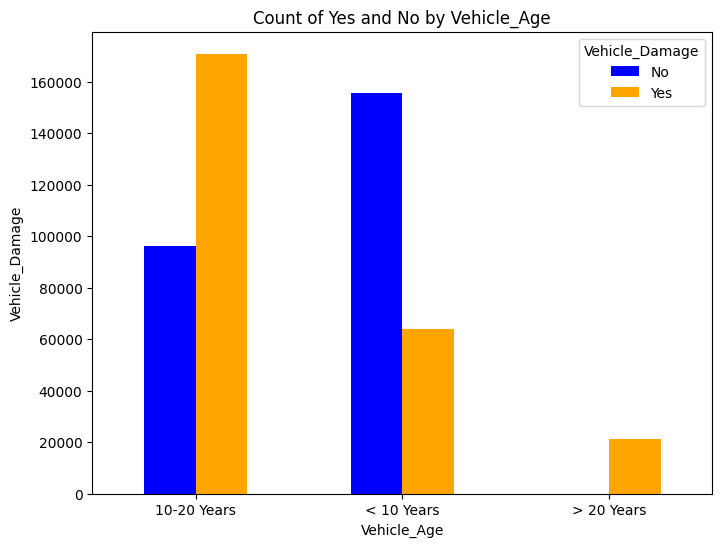

In [164]:
counts = data.groupby(['Vehicle_Age', 'Vehicle_Damage']).size().unstack(fill_value=0)
counts.plot(kind='bar', stacked=False, figsize=(8, 6), color=['blue', 'orange'])
data.head()
plt.xlabel("Vehicle_Age")
plt.ylabel("Vehicle_Damage")
plt.title("Count of Yes and No by Vehicle_Age")
plt.xticks(rotation=0)  # Keep x labels readable
plt.legend(title="Vehicle_Damage")
plt.show()


## distribution of customers across different regions. 
The majority of customers are from urban and suburban areas.
There is a relatively lower customer base in rural regions.
This is an insurance-related dataset, it may indicate higher demand for services in urban areas due to population density.

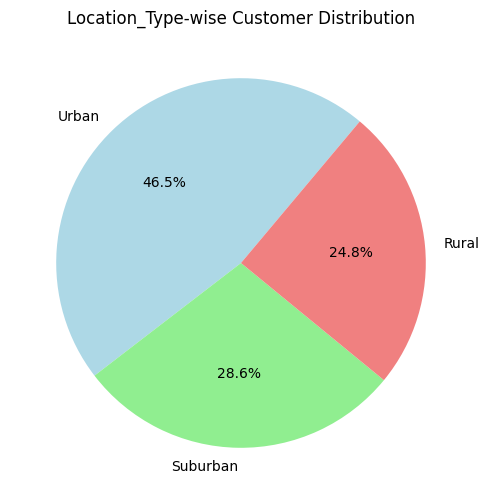

In [170]:
# Count the number of customers in each region
region_counts = data["Location_Type"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(region_counts, labels=region_counts.index, autopct="%1.1f%%", colors=['lightblue', 'lightgreen', 'lightcoral', 'gold'], startangle=50)

plt.title("Location_Type-wise Customer Distribution")
plt.show()

## analyze if previously insured customers tend to buy new policies
Platinum Tier I is more popular among those who were not previously insured.
Silver and Gold tiers are preferred by those who were previously insured.
This suggests that customers switching from previous insurers may opt for mid-range policies, while new customers go for higher-tier plans.

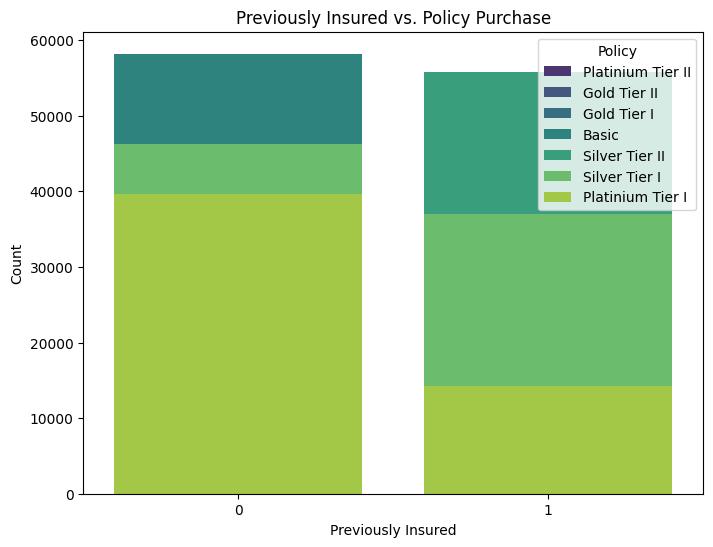

In [168]:
plt.figure(figsize=(8, 6))

# Create a stacked bar chart
sns.countplot(data, x="Previously_Insured", hue="Policy", dodge=False, palette="viridis")

plt.xlabel("Previously Insured")
plt.ylabel("Count")
plt.title("Previously Insured vs. Policy Purchase")
plt.show()

## Number of Men and Women Using Different Policies
Some policies (e.g., "Basic" and "Silver Tier II") have more male customers than female customers.
Some policies (e.g., "Gold Tier II" and "Silver Tier I") have a more balanced distribution between genders.
"Platinum Tier I" has a noticeable difference, with males significantly outnumbering females.

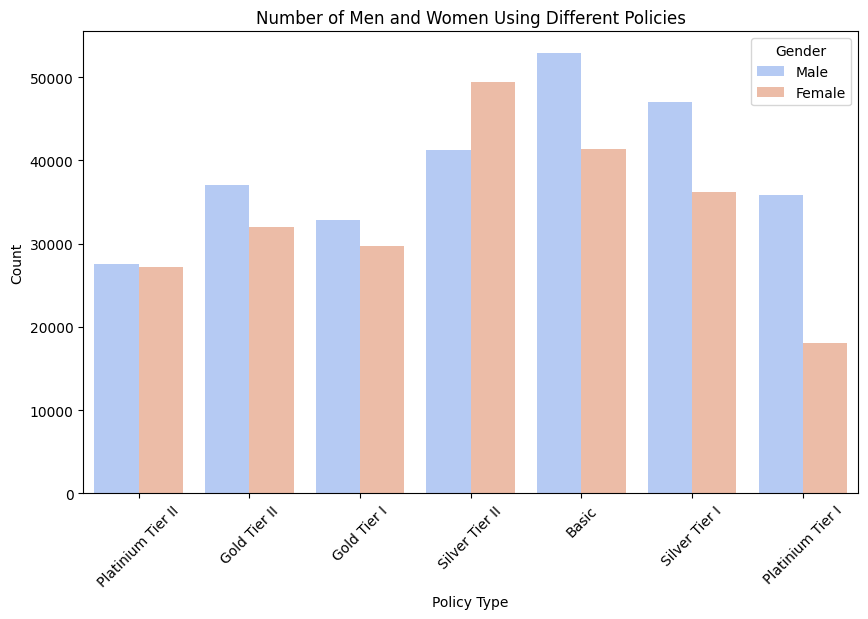

In [172]:
plt.figure(figsize=(10, 6))
sns.countplot(data, x="Policy", hue="Gender", palette="coolwarm")


plt.xlabel("Policy Type")
plt.ylabel("Count")
plt.title("Number of Men and Women Using Different Policies")
plt.xticks(rotation=45)  
plt.show()

## Proportion of Policies for Each Vehicle Type
Luxury vehicles (Luxury Car & Luxury SUV) tend to have higher-end policies (Platinum and Gold).
Normal Cars and SUVs have a more balanced spread across policy tiers, with a significant portion in Basic and Silver Tier categories.

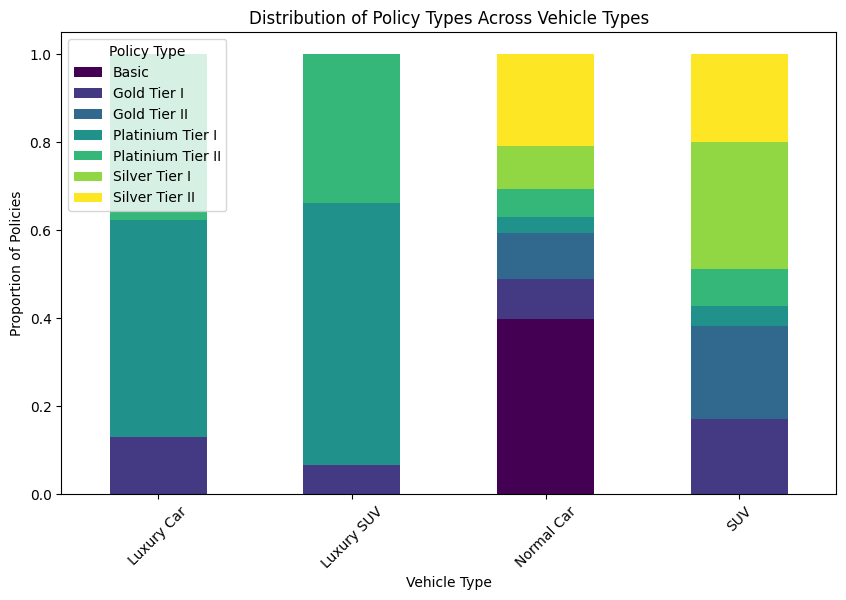

In [178]:
# Create a pivot table for proportions
policy_counts = data.groupby(["Vehicle_Type", "Policy"]).size().unstack()
policy_counts_norm = policy_counts.div(policy_counts.sum(axis=1), axis=0)  # Normalize

# Plot stacked bar chart
policy_counts_norm.plot(kind="bar", stacked=True, colormap="viridis", figsize=(10, 6))

# Customize labels and title
plt.xlabel("Vehicle Type")
plt.ylabel("Proportion of Policies")
plt.title("Distribution of Policy Types Across Vehicle Types")
plt.legend(title="Policy Type")
plt.xticks(rotation=45)  # Rotate for readability
plt.show()

## Average Income by Policy Type
Higher-tier policies (Platinum, Gold) are preferred by people with higher incomes.
Lower-tier policies (Silver, Basic) are more common among individuals with lower annual incomes.

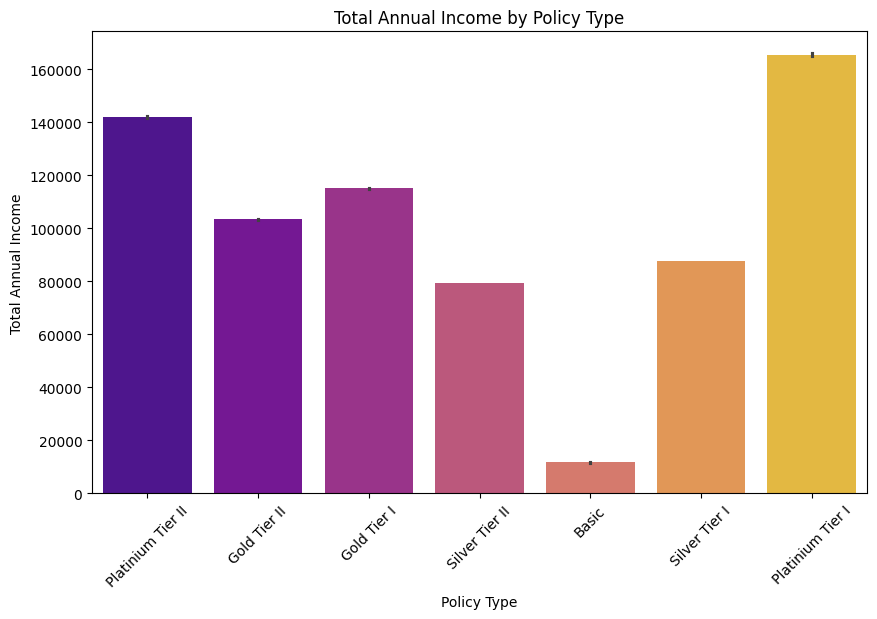

In [186]:
plt.figure(figsize=(10, 6))
sns.barplot(data, x="Policy", y="Annual_Income", hue="Policy", palette="plasma")

plt.xlabel("Policy Type")
plt.ylabel("Total Annual Income")
plt.title("Total Annual Income by Policy Type")
plt.xticks(rotation=45)
plt.show()

## Policy Distribution Across Locations
Urban locations have the highest number of policyholders across all policy types.
Suburban locations have a moderate distribution of policies.
Rural locations have fewer policies compared to Urban and Suburban areas.

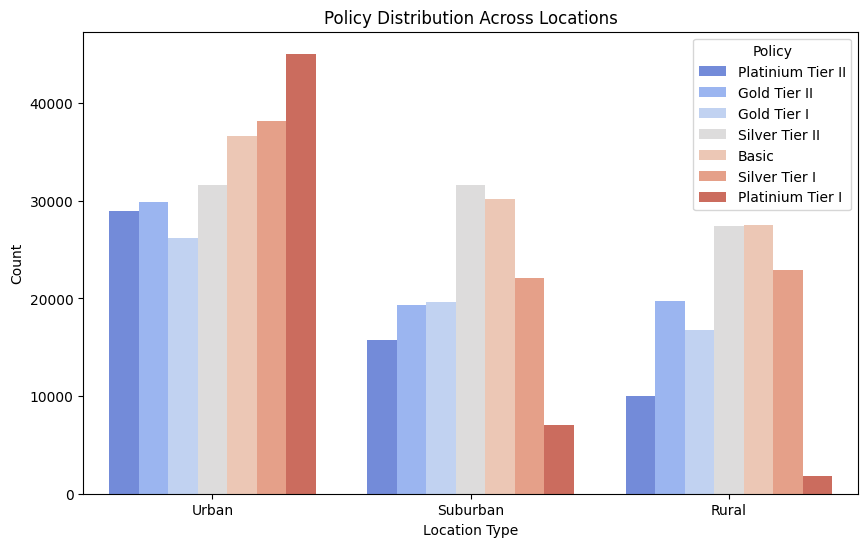

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data, x="Location_Type", hue="Policy", palette="coolwarm")
plt.xlabel("Location Type")
plt.ylabel("Count")
plt.title("Policy Distribution Across Locations")
plt.show()

## Remove the dependent or target variable column from the columns

In [ ]:
columns=[col for col in data.columns if col!="Policy"]
columns

['id',
 'Gender',
 'Age',
 'Region_Code',
 'Location_Type',
 'Education',
 'Annual_Income',
 'Vehicle_Type',
 'Previously_Insured',
 'Vehicle_Age',
 'Vehicle_Damage']

In [2]:
import pandas as pd
data=pd.read_csv("project_data.csv")
data

,id,Gender,Age,Region_Code,Location_Type,Education,Annual_Income,Vehicle_Type,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy
0,1,Male,44,NE,Urban,Bachelors,121362,Normal Car,0,> 20 Years,Yes,Platinium Tier II
1,2,Male,76,S,Suburban,Bachelors,100608,SUV,0,10-20 Years,No,Gold Tier II
2,3,Male,47,NE,Urban,Bachelors,114882,SUV,0,> 20 Years,Yes,Gold Tier I
3,4,Male,21,S,Suburban,College,85857,Normal Car,1,< 10 Years,No,Silver Tier II
4,5,Female,29,W,Rural,College,82488,SUV,1,< 10 Years,No,Silver Tier II
...,...,...,...,...,...,...,...,...,...,...,...,...
508141,508142,Female,26,NE,Rural,College,92601,SUV,1,< 10 Years,No,Gold Tier II
508142,508143,Female,38,NE,Urban,Masters,86100,SUV,0,10-20 Years,Yes,Silver Tier I
508143,508144,Male,21,MW,Rural,College,89406,SUV,1,< 10 Years,No,Silver Tier II
508144,508145,Male,71,NE,Urban,Bachelors,188625,Luxury SUV,1,10-20 Years,No,Platinium Tier I


## fill in the blanks in each column with the average.

In [ ]:
columns=[col for col in data.columns if col!="Policy"]
for col in columns:
    data[col]=data[col].fillna(data[col].mean())
data

In [ ]:
columns=[col for col in data.columns if col!="Policy"]
for col in columns:
    data[col]=data[col].fillna("1")
    

## Convert a non-numeric column to a numeric one

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Gender"]=le.fit_transform(data["Gender"])
data["Region_Code"]=le.fit_transform(data["Region_Code"])
data["Location_Type"]=le.fit_transform(data["Location_Type"])
data["Education"]=le.fit_transform(data["Education"])
data["Vehicle_Type"]=le.fit_transform(data["Vehicle_Type"])
data["Vehicle_Damage"]=le.fit_transform(data["Vehicle_Damage"])

data["Policy"]=le.fit_transform(data["Policy"])



In [13]:
data

,id,Gender,Age,Region_Code,Location_Type,Education,Annual_Income,Vehicle_Type,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy
0,1,1,44,1,2,0,121362,2,0,> 20 Years,1,4
1,2,1,76,2,1,0,100608,3,0,10-20 Years,0,2
2,3,1,47,1,2,0,114882,3,0,> 20 Years,1,1
3,4,1,21,2,1,1,85857,2,1,< 10 Years,0,6
4,5,0,29,3,0,1,82488,3,1,< 10 Years,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
508141,508142,0,26,1,0,1,92601,3,1,< 10 Years,0,2
508142,508143,0,38,1,2,4,86100,3,0,10-20 Years,1,5
508143,508144,1,21,0,0,1,89406,3,1,< 10 Years,0,6
508144,508145,1,71,1,2,0,188625,1,1,10-20 Years,0,3


In [6]:
Y=data["Policy"]
X=data.drop(columns="Policy")
X

,id,Gender,Age,Region_Code,Location_Type,Education,Annual_Income,Vehicle_Type,Previously_Insured,Vehicle_Age,Vehicle_Damage
0,1,1,44,1,2,0,121362,2,0,> 20 Years,1
1,2,1,76,2,1,0,100608,3,0,10-20 Years,0
2,3,1,47,1,2,0,114882,3,0,> 20 Years,1
3,4,1,21,2,1,1,85857,2,1,< 10 Years,0
4,5,0,29,3,0,1,82488,3,1,< 10 Years,0
...,...,...,...,...,...,...,...,...,...,...,...
508141,508142,0,26,1,0,1,92601,3,1,< 10 Years,0
508142,508143,0,38,1,2,4,86100,3,0,10-20 Years,1
508143,508144,1,21,0,0,1,89406,3,1,< 10 Years,0
508144,508145,1,71,1,2,0,188625,1,1,10-20 Years,0


## Split Data

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train
X_test
Y_train
Y_test

299638      Silver Tier II
336405       Silver Tier I
373094      Silver Tier II
469314      Silver Tier II
91525     Platinium Tier I
                ...       
58041       Silver Tier II
385998               Basic
158793    Platinium Tier I
205206               Basic
55651       Silver Tier II
Name: Policy, Length: 101630, dtype: object

## use pd.get_dummies() for one-hot encoding

In [6]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)


## Standarization

In [8]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)
X_train

array([[0.31896211, 1.        , 0.33846154, ..., 1.        , 0.        ,
        0.        ],
       [0.32377963, 1.        , 0.24615385, ..., 1.        , 0.        ,
        0.        ],
       [0.03922502, 0.        , 0.8       , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.25963455, 0.        , 0.03076923, ..., 0.        , 1.        ,
        0.        ],
       [0.28902577, 1.        , 0.36923077, ..., 1.        , 0.        ,
        0.        ],
       [0.2400063 , 0.        , 0.10769231, ..., 0.        , 1.        ,
        0.        ]])

## Predict: logestic regression, DecisionTree



## logestic regression
Model accuracy is 47.88%, which indicates that the Decision Tree model is not performing well. This is likely due to underfitting

In [ ]:

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Convert to DataFrame if using NumPy
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train)
if isinstance(X_test, np.ndarray):
    X_test = pd.DataFrame(X_test)

# Align features of train and test set
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Handle missing values
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

# Convert target to 1D array
Y_train = np.ravel(Y_train)
Y_test = np.ravel(Y_test)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data
X_test_scaled = scaler.transform(X_test)        # Transform test data

# Train model
model = LogisticRegression(max_iter=2000, solver='lbfgs', random_state=42)
model.fit(X_train_scaled, Y_train)

# Predict
Y_pred = model.predict(X_test_scaled)

# Accuracy
acc = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {acc:.4f}")


Accuracy: 0.4039


## Decision Tree
Model accuracy is 47.88%, which indicates that the Decision Tree model is not performing well. This is likely due to underfitting



In [4]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


data.fillna(0, inplace=True)  # Handle missing values
x = pd.get_dummies(data.drop(columns="Policy")) # Convert categorical features to numeric
y = data["Policy"]   # y: Target Variable


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)  # Splitting Data into Training and Testing Sets
x_train_sample, _, y_train_sample, _ = train_test_split(x_train, y_train, test_size=0.9, random_state=42) # training dataset to randomly select 10% of the original training data.
# Speed up training. Prevent overfitting on a small dataset.


model = DecisionTreeClassifier(max_depth=5, random_state=42) # Training a Decision Tree Classifier
model.fit(x_train_sample, y_train_sample)  # Trains the Decision Tree on only 10% of the original training data

# Evaluating Model Performance
accuracy = model.score(x_test, y_test)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.8420
